In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [422]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("dados", "df_tabela_ligantes.xlsx")
)

df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [423]:
df_duracoes = pd.read_excel(
    os.path.join("dados", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

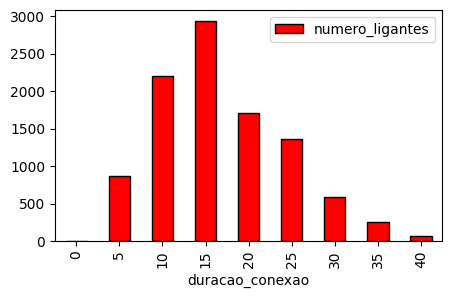

In [424]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5,3),
                 color="red",
                 edgecolor="black")

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


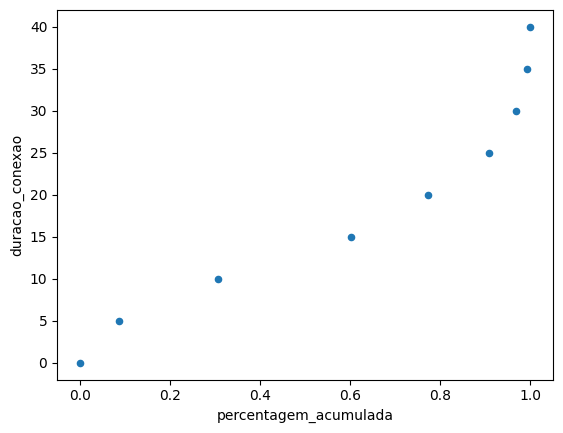

In [425]:
df_duracoes.plot(x="percentagem_acumulada",
                 y="duracao_conexao",
                 kind="scatter",
)
df_duracoes

In [426]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [427]:
x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

print(x[::100].round(1))
print(y[::100].round(1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


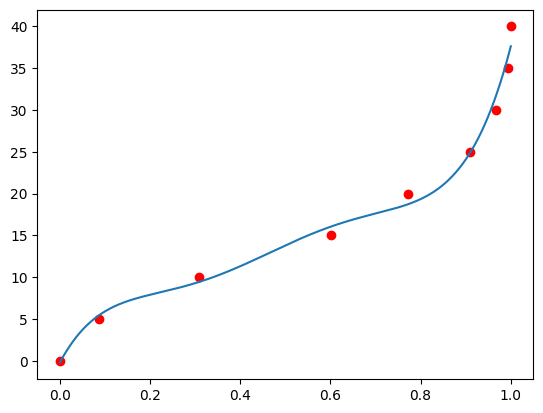

In [428]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

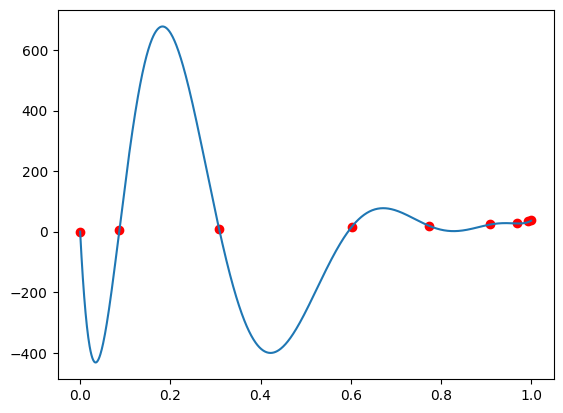

In [429]:
#Simulando mudana do coefs para grau 8 - fica claro que dá overfitting nos dados de treino/base

coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)

x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

In [430]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [431]:
np.polyval(coefs, 0)

-0.20625385923040085

In [432]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [433]:
#Criando mil aleatorios para simular o tempo de chegada das ligações
tempos_aleatorios = []

for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

14.366061693234672

In [434]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [435]:
#exibindo numero medio ligantes da primeira linha (linha 0)
qtd_ligacoes = \
df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

601

In [436]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [437]:
df_duracoes.loc[0,"duracao_conexao"]

0

In [438]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [439]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [440]:
#criando uma lista de dicionarios que vai conter os atendentes (inicio e fim de atendimento)
atendentes: list[dict] = []

In [441]:
np.set_printoptions(legacy="1.13")

In [442]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [443]:
#vamos sortear um aleatorio para simular o tempo que vai levar a primeira ligação
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548719


In [444]:
#validando se a lista de atendentes está vazia e se estiver e tem ligação, cria uma atendente
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    } 
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154871866302}]

In [445]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [446]:
espera_maxima = 10
tempo_descanso = 0

In [447]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611910921702

In [448]:
#alocando a ligação no atendente se ele estiver disponivel
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:
        
        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim

        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break

#Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
#estao ocupados, entao precisa criar um novo;
else: 
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

[{'inicio': 0, 'fim': 14.965154871866302},
 {'inicio': 3, 'fim': 14.718611910921702}]

In [449]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [450]:
np.random.seed(5)
espera_maxima = 10
tempo_descanso = 0
atendentes = []

for momento_ligacao in momentos_ligacoes:
    # print(momento_ligacao)
    aleatorio = np.random.rand()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    #alocando a ligação no atendente se ele estiver disponivel
    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:
            
            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim

            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break

    #Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
    #estao ocupados, entao precisa criar um novo;
    else: 
        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [451]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [452]:
len(atendentes)

20

In [453]:
#Para evitar que o primeiro atendente seja sempre o primeiro a ser alocado, é necessário embaralhar a ordem dos atendentes 
# para alocar as ligações depois
np.random.permutation([1,2,3,4,5,6,7,8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [454]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []

for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843894401},
 {'inicio': 900, 'fim': 910.8933443095973},
 {'inicio': 899, 'fim': 932.21236758365058},
 {'inicio': 909, 'fim': 917.53861755832725},
 {'inicio': 904, 'fim': 920.23396462394362},
 {'inicio': 899, 'fim': 908.85265704367271},
 {'inicio': 867, 'fim': 894.99620690112238},
 {'inicio': 901, 'fim': 917.6665794080742},
 {'inicio': 907, 'fim': 915.17518229744098},
 {'inicio': 906, 'fim': 913.65133331325376},
 {'inicio': 896, 'fim': 906.82228408336164},
 {'inicio': 892, 'fim': 907.66966276223832},
 {'inicio': 882, 'fim': 901.13837906628623},
 {'inicio': 883, 'fim': 902.83508527519712},
 {'inicio': 814, 'fim': 843.61932084942623},
 {'inicio': 899, 'fim': 907.73089614730179},
 {'inicio': 896, 'fim': 912.80887287288704},
 {'inicio': 906, 'fim': 930.7765085877561},
 {'inicio': 906, 'fim': 914.04967842284293}]

In [455]:
len(atendentes)

19

In [456]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [457]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []

for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [458]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


---
# Attentus

In [459]:
import pulp as plp

In [460]:
df_nan = df_tabela_ligantes.copy()
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [461]:
df_nad = pd.read_excel(
    os.path.join("dados", "nad.xlsx")
)
df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [462]:
from itertools import product

In [463]:
regimes = df_nad["regime"].to_dict()
regimes

{0: 3, 1: 4, 2: 6}

In [464]:
inicios = df_nan["hora_inicio"].to_dict()
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [465]:
lista_variaveis = list(product(regimes, inicios))
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [466]:
prob = plp.LpProblem(
    name="Attentus", sense=plp.LpMinimize
)
prob

Attentus:
MINIMIZE
None
VARIABLES

In [467]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
)
pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [468]:
coeficientes = []
for indice_regime, indice_periodo in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)
print(coeficientes[::10])

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [469]:
#criando função objetivo
fo = plp.lpSum(
    [coef * pulp_variaveis[var] 
     for coef, var in zip(coeficientes, lista_variaveis)]
)

#cadastrando função objetivo no problema
prob+= fo, "custo"
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [470]:
prob.numVariables()

288

In [471]:
prob.numConstraints()

0

In [472]:
lista = [0, 1, 2, 3, 4, 5, 6, 7]
lista

[0, 1, 2, 3, 4, 5, 6, 7]

In [473]:
janela = 3

In [474]:
# j = 2
lista[0:3]

[0, 1, 2]

In [475]:
# j = 3
lista[1:4]

[1, 2, 3]

In [476]:
# j = 4
lista[2:5]

[2, 3, 4]

In [477]:
# j = 5
lista[3:6]

[3, 4, 5]

In [478]:
# j = 6
lista[4:7]

[4, 5, 6]

In [479]:
# j = 7
lista[5:8]

[5, 6, 7]

In [480]:
# j = 0
lista[6:9]

[6, 7]

In [481]:
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [482]:
#Extend é diferente de append.. enquanto append adiciona o ultimo elemento, extend adiciona o elemento mantendo o formato de lista

#j = 0
print(lista[-2:] + lista[:1])

[6, 7, 0]


In [483]:
lista[-1:] + lista[:2]

[7, 0, 1]

In [484]:
print(lista[-2:] + lista[:1])
print(lista[-1:] + lista[:2])

print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [485]:
print(lista[0:2+1]) # j = 2, jan = 3
print(lista[1:3+1]) # j = 3, jan = 3
print(lista[2:4+1]) # j = 4, jan = 3
print(lista[3:5+1]) # j = 5, jan = 3
print(lista[4:6+1]) # j = 6, jan = 3
print(lista[5:7+1]) # j = 7, jan = 3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [486]:
#Logica (j-jan+1:j+1)

print(lista[2-3+1 : 2+1]) # j = 2, jan = 3
print(lista[3-3+1 : 3+1]) # j = 3, jan = 3
print(lista[4-3+1 : 4+1]) # j = 4, jan = 3
print(lista[5-3+1 : 5+1]) # j = 5, jan = 3
print(lista[6-3+1 : 6+1]) # j = 6, jan = 3
print(lista[7-3+1 : 7+1]) # j = 7, jan = 3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [487]:
print(lista[-2:] , lista[:1]) # j = 0, jan=3
print(lista[-1:] , lista[:2]) # j = 1, jan=3

#Logica (j-jan+1:j+1)
print(lista[0-3+1:] + lista[:0+1]) # j = 0, jan=3
print(lista[1-3+1:] + lista[:1+1]) # j = 1, jan=3

[6, 7] [0]
[7] [0, 1]
[6, 7, 0]
[7, 0, 1]


In [488]:
#Logica (j-jan+1:j+1)
print(lista[0-3+1:] + lista[:0+1]) # j = 0, jan=3
print(lista[1-3+1:] + lista[:1+1]) # j = 1, jan=3
print(lista[2-3+1 : 2+1]) # j = 2, jan = 3
print(lista[3-3+1 : 3+1]) # j = 3, jan = 3
print(lista[4-3+1 : 4+1]) # j = 4, jan = 3
print(lista[5-3+1 : 5+1]) # j = 5, jan = 3
print(lista[6-3+1 : 6+1]) # j = 6, jan = 3
print(lista[7-3+1 : 7+1]) # j = 7, jan = 3

#Logica lousa: lista[j-jan+1:]+lista[]:j+1] [0,1]

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [489]:
def retorna_lista(j, tamanho, lista):
    if j >= tamanho - 1:
        return lista[j-tamanho+1 : j+1]
    else:
        return lista[j-tamanho+1 : ] + lista[ : j+1]

In [490]:
retorna_lista(j=4, tamanho=3, lista=lista)

[2, 3, 4]

In [491]:
retorna_lista(j=5, tamanho=3, lista=lista)

[3, 4, 5]

In [492]:
retorna_lista(j=7, tamanho=3, lista=lista)

[5, 6, 7]

In [493]:
retorna_lista(j=0, tamanho=3, lista=lista)

[6, 7, 0]

In [494]:
retorna_lista(j=1, tamanho=3, lista=lista)

[7, 0, 1]

In [495]:
retorna_lista(j=0, tamanho=12, lista=list(inicios))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [496]:
retorna_lista(j=0, tamanho=12, lista=list(inicios))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [497]:
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [498]:
#para fazer um for em um dataframe, usamos iterrrows:
for j, linha in df_nan.iterrows(): 
    print(j, linha, sep="\n")
    print("*" * 50)

0
rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
nan                            20
Name: 0, dtype: object
**************************************************
1
rotulo                          2
hora_inicio              00:15:00
hora_fim                 00:30:00
numero_medio_ligantes         190
nan                             9
Name: 1, dtype: object
**************************************************
2
rotulo                          3
hora_inicio              00:30:00
hora_fim                 00:45:00
numero_medio_ligantes         180
nan                             8
Name: 2, dtype: object
**************************************************
3
rotulo                          4
hora_inicio              00:45:00
hora_fim                 01:00:00
numero_medio_ligantes         177
nan                             9
Name: 3, dtype: object
**************************************************
4
rotulo        

In [499]:
#se nao coloca iterrows ele intera as colunas
for x in df_nan:
    print(x)

rotulo
hora_inicio
hora_fim
numero_medio_ligantes
nan


In [500]:
#para fazer um for em um dataframe, usamos iterrrows:
for j, linha in df_nan.iterrows(): 
    # print(j, linha, sep="\n")
    # print("*" * 50)
    nan = linha["nan"]
    # print(j, nan)
    for regime in regimes:
        # print(regime)
        # print(regimes[regime])
        tamanho = regimes[regime] * 4
        lista = retorna_lista(j=j, tamanho=tamanho, lista=list(inicios))
        # print(regime, lista)
        lista_combinada = [(regime, i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla] for tupla in lista_combinada]
        # print(lista_combinada)
        # print(lista_traduzida)
    print("-" * 20)

--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
-------------

In [501]:
#criando as restições do problema
for j, linha in df_nan.iterrows(): 
    nan = linha["nan"]
    linha_resticao = []
    for regime in regimes:
        tamanho = regimes[regime] * 4
        lista = retorna_lista(j=j, tamanho=tamanho, lista=list(inicios))
        lista_combinada = [(regime, i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla] for tupla in lista_combinada]
        linha_resticao += lista_traduzida
    prob += plp.lpSum(linha_resticao) >= nan
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [502]:
prob.numConstraints()

96

In [503]:
prob.status

0

In [504]:
plp.LpStatus

{0: 'Not Solved',
 1: 'Optimal',
 -1: 'Infeasible',
 -2: 'Unbounded',
 -3: 'Undefined'}

In [505]:
plp.LpStatus[prob.status]

'Not Solved'

In [506]:
plp.listSolvers(onlyAvailable=True)

['PULP_CBC_CMD']

In [507]:
solver = plp.getSolver('PULP_CBC_CMD')

In [508]:
prob.solve(solver)

1

In [509]:
prob.objective.value()

153480.0

In [510]:
for i, v in enumerate(prob.variables()):
    # print(v.name, "=", v.varValue)
    valor_var = v.varValue

In [511]:
resultados = []
for v_pulp, v_tupla in zip(prob.variables(), lista_variaveis):
    # print(v.name, "=", v.varValue)
    print(v_pulp, v_tupla)

A_(0,_0) (0, 0)
A_(0,_1) (0, 1)
A_(0,_10) (0, 2)
A_(0,_11) (0, 3)
A_(0,_12) (0, 4)
A_(0,_13) (0, 5)
A_(0,_14) (0, 6)
A_(0,_15) (0, 7)
A_(0,_16) (0, 8)
A_(0,_17) (0, 9)
A_(0,_18) (0, 10)
A_(0,_19) (0, 11)
A_(0,_2) (0, 12)
A_(0,_20) (0, 13)
A_(0,_21) (0, 14)
A_(0,_22) (0, 15)
A_(0,_23) (0, 16)
A_(0,_24) (0, 17)
A_(0,_25) (0, 18)
A_(0,_26) (0, 19)
A_(0,_27) (0, 20)
A_(0,_28) (0, 21)
A_(0,_29) (0, 22)
A_(0,_3) (0, 23)
A_(0,_30) (0, 24)
A_(0,_31) (0, 25)
A_(0,_32) (0, 26)
A_(0,_33) (0, 27)
A_(0,_34) (0, 28)
A_(0,_35) (0, 29)
A_(0,_36) (0, 30)
A_(0,_37) (0, 31)
A_(0,_38) (0, 32)
A_(0,_39) (0, 33)
A_(0,_4) (0, 34)
A_(0,_40) (0, 35)
A_(0,_41) (0, 36)
A_(0,_42) (0, 37)
A_(0,_43) (0, 38)
A_(0,_44) (0, 39)
A_(0,_45) (0, 40)
A_(0,_46) (0, 41)
A_(0,_47) (0, 42)
A_(0,_48) (0, 43)
A_(0,_49) (0, 44)
A_(0,_5) (0, 45)
A_(0,_50) (0, 46)
A_(0,_51) (0, 47)
A_(0,_52) (0, 48)
A_(0,_53) (0, 49)
A_(0,_54) (0, 50)
A_(0,_55) (0, 51)
A_(0,_56) (0, 52)
A_(0,_57) (0, 53)
A_(0,_58) (0, 54)
A_(0,_59) (0, 55)
A_(0,_6)

In [512]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    # print(v_pulp.varValue, v_tupla)
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    # print(nome_regime, nome_inicio)
    resultados.append({
        "regime": nome_regime,
        "inicio": nome_inicio,
        "valor": v_pulp.varValue
    })
resultados

[{'regime': 3, 'inicio': datetime.time(0, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 45), 'valor': 0.0},
 {'regime': 

In [513]:
df_resultados = pd.DataFrame(resultados)
df_resultados


,regime,inicio,valor
0,3,00:00:00,0.0
1,3,00:15:00,0.0
2,3,00:30:00,0.0
3,3,00:45:00,0.0
4,3,01:00:00,0.0
...,...,...,...
283,6,22:45:00,1.0
284,6,23:00:00,0.0
285,6,23:15:00,0.0
286,6,23:30:00,2.0


In [514]:
#filtrando a tabela para ver somene valores maiores que 0
df_resultados.loc[df_resultados["valor"] > 0]

,regime,inicio,valor
36,3,09:00:00,5.0
58,3,14:30:00,3.0
113,4,04:15:00,1.0
124,4,07:00:00,9.0
125,4,07:15:00,1.0
126,4,07:30:00,2.0
127,4,07:45:00,2.0
128,4,08:00:00,6.0
129,4,08:15:00,1.0
132,4,09:00:00,2.0


In [515]:
df_resultados_pivotado = df_resultados.pivot_table(
                          columns="regime", 
                          index="inicio",
                          values="valor")
df_resultados_pivotado



regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [516]:
df_resultados_pivotado.sum(axis=0)

regime
3      8.0
4     57.0
6    115.0
dtype: float64

---
GENERALIZANDO O ATTENTUS

In [517]:
#GERERALIZANDO O ATTENTUUUUUUUUUUUUS

def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)

    return divisores

encontra_divisores(60)

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [518]:
qtd_horas_total = 24
hora_inicial = 0
minuto_inicial = 0

In [519]:
qtd_dias_total = qtd_horas_total / 24
qtd_minutos_total = qtd_horas_total * 60
print(qtd_dias_total, qtd_minutos_total) 

1.0 1440


In [520]:
divisores = encontra_divisores(qtd_minutos_total)
print(divisores)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720]


In [521]:
minutos_dividir = divisores[10]
minutos_dividir

15

In [522]:
print(3 * 60 / minutos_dividir)
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)
print(6.11 * 60 / minutos_dividir)


12.0
16.0
24.0
24.44


In [523]:
print((3.00 * 60 / minutos_dividir).as_integer_ratio())
print((4.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.11 * 60 / minutos_dividir).as_integer_ratio())


(12, 1)
(16, 1)
(24, 1)
(6879248430808433, 281474976710656)


In [524]:
1 / 60

0.016666666666666666

In [525]:
np.arange(1, 
          12+1/60,
          1/60)

array([  1.        ,   1.01666667,   1.03333333,   1.05      ,
         1.06666667,   1.08333333,   1.1       ,   1.11666667,
         1.13333333,   1.15      ,   1.16666667,   1.18333333,
         1.2       ,   1.21666667,   1.23333333,   1.25      ,
         1.26666667,   1.28333333,   1.3       ,   1.31666667,
         1.33333333,   1.35      ,   1.36666667,   1.38333333,
         1.4       ,   1.41666667,   1.43333333,   1.45      ,
         1.46666667,   1.48333333,   1.5       ,   1.51666667,
         1.53333333,   1.55      ,   1.56666667,   1.58333333,
         1.6       ,   1.61666667,   1.63333333,   1.65      ,
         1.66666667,   1.68333333,   1.7       ,   1.71666667,
         1.73333333,   1.75      ,   1.76666667,   1.78333333,
         1.8       ,   1.81666667,   1.83333333,   1.85      ,
         1.86666667,   1.88333333,   1.9       ,   1.91666667,
         1.93333333,   1.95      ,   1.96666667,   1.98333333,
         2.        ,   2.01666667,   2.03333333,   2.05

In [526]:
def lista_turnos_possivieis(minutos_dividir,
                            horas_minimas=1,
                            horas_maximas=12):
    passo = 1/60
    turnos_testar = np.arange(horas_minimas,
                              horas_maximas+passo,
                              passo).round(5)
    turnos_horas = []
    for turno in turnos_testar:
        num, den = \
            (turno * 60 / minutos_dividir).as_integer_ratio()
        if den == 1:
            turnos_horas.append(turno)

    return turnos_horas

lista_turnos_possivieis(15, 3, 6)

[3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

In [527]:
def float_para_horas_minutos(float_num):
    horas = int(float_num)
    minutos = int((float_num - horas) * 60)
    return horas, minutos

In [528]:
dict_turnos_possiveis = {}
for turno in lista_turnos_possivieis(minutos_dividir, 3, 6):
    horas, minutos = float_para_horas_minutos(turno)
    dict_turnos_possiveis[f"{horas:02}h{minutos:02}"] = turno
print(dict_turnos_possiveis)

{'03h00': 3.0, '03h15': 3.25, '03h30': 3.5, '03h45': 3.75, '04h00': 4.0, '04h15': 4.25, '04h30': 4.5, '04h45': 4.75, '05h00': 5.0, '05h15': 5.25, '05h30': 5.5, '05h45': 5.75, '06h00': 6.0}


In [529]:
from datetime import datetime as dtm 
from datetime import timedelta as td

In [530]:
hora_inicial = 0
minuto_inicial = 0

In [531]:
qtd_horas_total

24

In [532]:
hora_final = (hora_inicial + qtd_horas_total) % 24
minuto_final = (qtd_horas_total - int(qtd_horas_total))*60
print(hora_final, minuto_final)

0 0


In [533]:
dia_final = 1
if hora_inicial == hora_final and minuto_inicial == minuto_final:
    dia_final = 2
dia_final

2

In [534]:
inicios = \
pd.date_range(
    start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
    end=dtm.strptime(
    f"2000-01-{dia_final} {hora_final:02}:{minuto_final:02}:59",
    "%Y-%m-%d %H:%M:%S"
    ),
    freq=f"{minutos_dividir}min"
).strftime("%H:%M:%S").tolist()[:-1]
inicios

['00:00:00',
 '00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',

In [535]:
finais = [
    (dtm.strptime(inicio, "%H:%M:%S") + \
    td(minutes=minutos_dividir)).strftime("%H:%M:%S") for inicio in inicios
]
finais

['00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',
 '19:15:00',

In [536]:
len(inicios), len(finais)

(96, 96)

In [537]:
#Aprendendo a usar date range (que gera tempos dentro de um intervalo definido)
pd.date_range(
    start=f"2000-01-01 {hora_inicial:02}:{minuto_final:02}",
    end=f"2000-01-{dia_final}",
    freq=f"{minutos_dividir}min"
)[:-1].strftime("%H:%M:%S")

Index(['00:00:00', '00:15:00', '00:30:00', '00:45:00', '01:00:00', '01:15:00',
       '01:30:00', '01:45:00', '02:00:00', '02:15:00', '02:30:00', '02:45:00',
       '03:00:00', '03:15:00', '03:30:00', '03:45:00', '04:00:00', '04:15:00',
       '04:30:00', '04:45:00', '05:00:00', '05:15:00', '05:30:00', '05:45:00',
       '06:00:00', '06:15:00', '06:30:00', '06:45:00', '07:00:00', '07:15:00',
       '07:30:00', '07:45:00', '08:00:00', '08:15:00', '08:30:00', '08:45:00',
       '09:00:00', '09:15:00', '09:30:00', '09:45:00', '10:00:00', '10:15:00',
       '10:30:00', '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00',
       '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00', '13:15:00',
       '13:30:00', '13:45:00', '14:00:00', '14:15:00', '14:30:00', '14:45:00',
       '15:00:00', '15:15:00', '15:30:00', '15:45:00', '16:00:00', '16:15:00',
       '16:30:00', '16:45:00', '17:00:00', '17:15:00', '17:30:00', '17:45:00',
       '18:00:00', '18:15:00', '18:30:00', '18:45:00

In [538]:
def attentus(df_nan, df_nad, minutos_dividir):
    regimes = \
        df_nad["regime"].to_dict()
    inicios = \
        df_nan["hora_inicio"].to_dict()
    
    lista_variaveis = list(product(regimes, inicios))

    prob = plp.LpProblem(
        name="Attentus", sense=plp.LpMinimize
    )
    
    pulp_variaveis = plp.LpVariable.dicts(
        "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
    )

    coeficientes = []
    for indice_regime, indice_periodo in lista_variaveis:
        encargo = df_nad.loc[indice_regime, "enc"]
        coeficientes.append(encargo)

    fo = plp.lpSum(
        [coef * pulp_variaveis[var] 
        for coef, var in zip(coeficientes, lista_variaveis)]
    )
    prob += fo, "custo"

    for j, linha in df_nan.iterrows():
        nan = linha["nan"]
        linha_restricao = []
        for indice_regime, regime in regimes.items():
            tamanho = int(regime * 60 / minutos_dividir)
            lista = retorna_lista(j=j, tamanho=tamanho,
                                lista=list(inicios))
            
            lista_combinada = [(indice_regime, i) for i in lista]
            lista_traduzida = [pulp_variaveis[tupla] 
                            for tupla in lista_combinada]
            
            linha_restricao += lista_traduzida
        prob += plp.lpSum(linha_restricao) >= nan
    
    solver = plp.getSolver('PULP_CBC_CMD')
    prob.solve(solver)
    return prob

In [539]:
prob = attentus(df_nan, df_nad, minutos_dividir)
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [540]:
plp.LpStatus[prob.status]

'Optimal'

In [541]:
def gera_resultados(prob, regimes, inicios):
    resultados = []
    for v_tupla, v_pulp in pulp_variaveis.items():
        # print(v_pulp.varValue, v_tupla)
        indice_regime, indice_inicio = v_tupla
        nome_regime = regimes[indice_regime]
        nome_inicio = inicios[indice_inicio]
        # print(nome_regime, nome_inicio)
        resultados.append({
            "regime": nome_regime,
            "inicio": nome_inicio,
            "valor": v_pulp.varValue
        })

    df_resultados = pd.DataFrame(resultados)
    df_resutados_pivotado = \
        df_resultados.pivot_table(columns="regime",
                                index="inicio",
                                values="valor")
    
    return df_resutados_pivotado


In [542]:
df_resultados = gera_resultados(prob,
                                regimes,
                                inicios)
df_resultados

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [543]:
def ajusta_polinomio(df_duracoes: pd.DataFrame, 
                     g: int) -> list:
    
    coefs = \
    metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "percentagem_acumulada"],
                                saidas=df_duracoes.loc[:, "duracao_conexao"],
                                g=g)
    
    # gera 1000 valores de zero à um
    x = np.linspace(start=0, stop=1, num=1000)
    # usa o polinômio ajustado para gerar os valores de y
    y = np.polyval(p=coefs, x=x)

    percentagens_acumuladas = df_duracoes.loc[:, "percentagem_acumulada"]
    duracoes = df_duracoes.loc[:, "duracao_conexao"]

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(percentagens_acumuladas, duracoes, 
                color="red", label="Dados Originais", edgecolors="black")

    # faz o gráfico do ajuste polinomial
    ax.plot(x, y)
    return fig

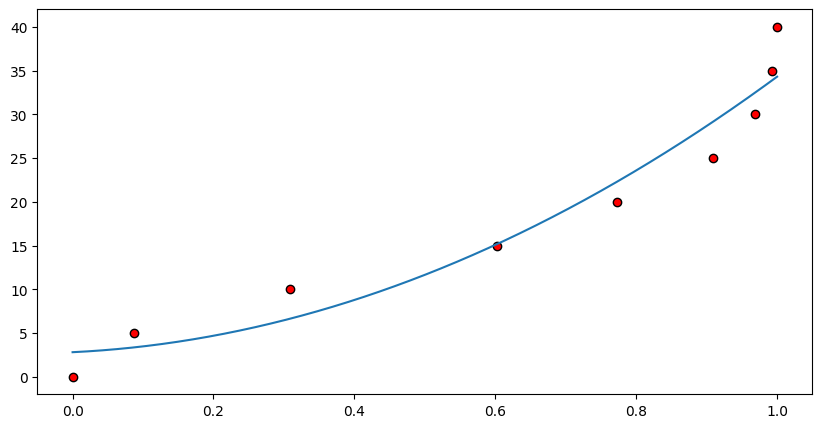

In [544]:
fig = ajusta_polinomio(df_duracoes, g=2)

In [545]:
def gerar_tabela_nan(df_tabela_ligantes: pd.DataFrame,
                     df_duracoes: pd.DataFrame,
                     tempo_maximo_espera: float = 10,
                     tempo_descanso: int = 0,
                     g: int = 5) -> list:

    """
    Função para gerar a lista de NANs para cada período do dia

    Args:
        df_tabela_ligantes (pd.DataFrame): DataFrame com a quantidade de ligantes. 
        (obrigatório)
        df_duracoes (pd.DataFrame): DataFrame com as durações das ligações. 
        (obrigatório)
        tempo_maximo_espera (float): Tempo máximo de espera (opcional, default=10)
        g (int): Grau do polinômio de ajuste (opcional, default=5)
    Returns:
        pd.DataFrame: DataFrame com a quantidade de NANs
    """

    coefs = metodo_minimos_quadrados.mmq(
        entradas=df_duracoes.loc[:, "percentagem_acumulada"],
        saidas=df_duracoes.loc[:, "duracao_conexao"],
        g=g)


    # conjunto de nan para cada periodo do dia 
    # (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
    coluna_nan = []

    # para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
    for i, linha in df_tabela_ligantes.iterrows():

        # pega a qtd_ligantes para cada periodo do dia
        qtd_ligantes = linha["numero_medio_ligantes"]

        # gera aleatoriamente os momentos de ligação para cada periodo do dia
        momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
        # ordena os momentos de ligação para executar o algoritmo nan
        momentos_ligacoes.sort()
        
        # cria uma lista de atendentes necessários para atender as ligações para cada 
        # periodo do dia
        atendentes: list[dict] = []

        # para cada ligação
        for momento_ligacao in momentos_ligacoes:
            
            # gerando a duração da ligação
            aleatorio = np.random.rand()

            # gerando a duração da ligação
            duracao = abs(np.polyval(coefs, aleatorio))

            # para cada atendente, checar se ele estará ocupado no momento da 
            # ligação + tempo máximo de espera. Se não estiver, ele atende a ligação
            # se todos estiverem ocupados, criar um novo atendente
            for atendente in atendentes:

                fim_atendimento = atendente["fim_atendimento"] + tempo_descanso

                # checando se o atendente está ocupado daqui a 10 segundos do momento 
                # da ligação ocupado = atendente.checar_ocupado(momento_ligacao + 10)
                if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                    ocupado = False
                else:
                    ocupado = True

                if not ocupado:
                    # se o atendente não estiver ocupado, ele atende a ligação
                    # atendente.atender_ligacao_futura(duracao)
                    if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                        atendente["inicio_atendimento"] = \
                            momento_ligacao + tempo_maximo_espera
                    else:
                        atendente["inicio_atendimento"] = fim_atendimento
                    
                    atendente["fim_atendimento"] = \
                        atendente["inicio_atendimento"] + duracao
                    break
            else:
                # entra aqui apenas se nunca ocorrer o break (ou seja, 
                # se todos os atendentes estiverem ocupados)

                novo_atendende = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                atendentes.append(novo_atendende)

        # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
        # quantidade de atendentes criados para atender todas as ligações com 
        # 10 segundos de tempo máximo de espera    
        nan = len(atendentes)
        
        # antes de partir para a simulação do próximo período do dia, adicionar o 
        # resultado na coleção de nan para cada período do dia
        coluna_nan.append(nan)

    return coluna_nan

In [546]:
gerar_tabela_nan(df_tabela_ligantes,
                 df_duracoes,
                 10, 0, 5)

[20,
 9,
 8,
 10,
 8,
 6,
 6,
 7,
 6,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 5,
 8,
 7,
 8,
 18,
 21,
 23,
 23,
 39,
 47,
 38,
 42,
 60,
 63,
 62,
 67,
 71,
 73,
 69,
 71,
 67,
 74,
 65,
 68,
 54,
 63,
 59,
 61,
 61,
 68,
 67,
 69,
 67,
 65,
 63,
 63,
 66,
 72,
 70,
 68,
 65,
 67,
 71,
 72,
 76,
 70,
 75,
 66,
 52,
 52,
 46,
 50,
 44,
 37,
 40,
 38,
 41,
 38,
 37,
 37,
 34,
 35,
 30,
 29,
 30,
 26,
 28,
 28,
 25,
 17,
 16,
 19]

In [547]:
def gera_tabelas(
        qtd_horas_total, minutos_dividir,
        hora_inicial, minuto_inicial,
        turnos, encargos):

    hora_final = (hora_inicial + qtd_horas_total) % 24
    minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60

    dia_final = 1
    if hora_inicial == hora_final and minuto_inicial == minuto_final:
        dia_final = 2
    
    inicios = \
        pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final} {int(hora_final):02}:{int(minuto_final):02}:59", "%Y-%m-%d %H:%M:%S"),
        freq=f"{minutos_dividir}min").strftime("%H:%M:%S").tolist()[:-1]
    
    finais = \
        [(dtm.strptime(inicio, "%H:%M:%S") + td(minutes=minutos_dividir)).strftime("%H:%M:%S") 
        for inicio in inicios]
    
    df_nad = pd.DataFrame({
        "regime": turnos,
        "enc": encargos})
    
    df_tabela_ligantes = pd.DataFrame({
        "rotulo": range(1, len(inicios) + 1),
        "hora_inicio": inicios,
        "hora_fim": finais})
    df_tabela_ligantes["numero_medio_ligantes"] = ""

    return df_nad, df_tabela_ligantes

In [548]:
encargos = [560, 640, 980]

In [549]:
turnos = [3, 4, 6]

In [550]:
df_nad, df_tabela_ligantes = gera_tabelas(qtd_dias_total, minutos_dividir,
                                          hora_inicial, minuto_inicial,
                                          turnos, encargos)

In [551]:
df_nad

,regime,enc
0,3,560
1,4,640
2,6,980


In [552]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,
1,2,00:15:00,00:30:00,
2,3,00:30:00,00:45:00,
3,4,00:45:00,01:00:00,


In [553]:
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000
